# Visulaization Process by using Python Process

# Importing and Reading the file

In [39]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

data = pd.read_csv("edited.csv")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Month_name_year_wise,Day,Year,Day_name,Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,December,1,2010,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,December,1,2010,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12,December,1,2010,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,December,1,2010,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,December,1,2010,Wednesday,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534740,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,12,December,9,2011,Friday,10.20
534741,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12,December,9,2011,Friday,12.60
534742,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,12,December,9,2011,Friday,16.60
534743,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,12,December,9,2011,Friday,16.60


# Creating dataframe

In [44]:
df = pd.DataFrame(data)

# Top 10 Customers By Quantity

In [3]:
customers = df.groupby("CustomerID")["Quantity"].sum()
sorting = customers.sort_values(ascending=False)
top_10_customers = sorting.head(10)
top_10_customers

CustomerID
15287    608836
14646    198263
16446    161992
12346    148430
14911     83825
12415     78098
17450     70937
17511     66086
13694     64725
18102     64126
Name: Quantity, dtype: int64

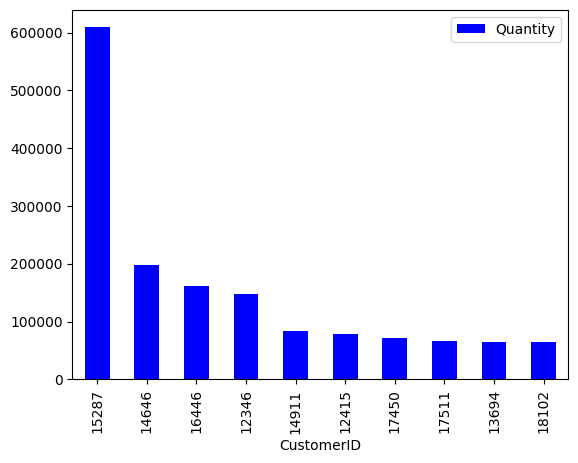

In [4]:
sorting.head(10).plot(kind="bar", color = "Blue")
plt.legend()
plt.show()

# Top 10 Product Description

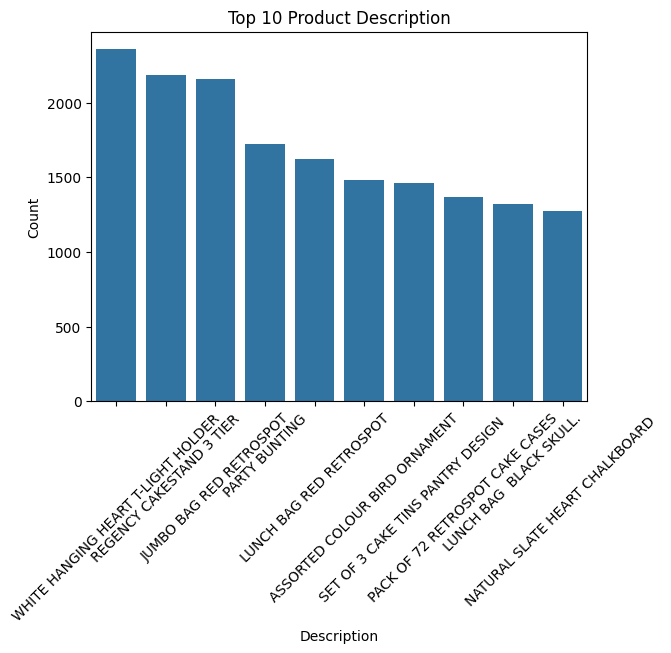

In [46]:
top_10_description = df["Description"].value_counts().nlargest(10)
sns.barplot(x=top_10_description.index, y=top_10_description.values)
plt.xlabel("Description")
plt.ylabel("Count")
plt.title("Top 10 Product Description")
plt.xticks(rotation = 45)
plt.show()

# Top 10 countries by quantity

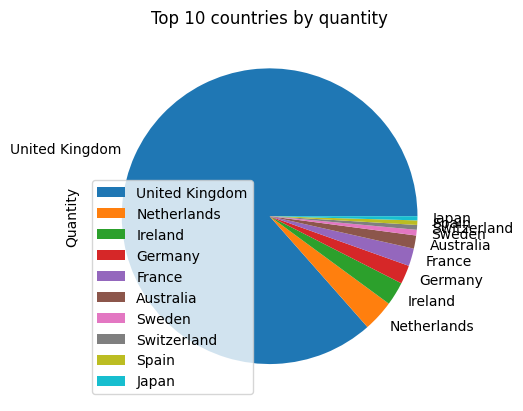

In [17]:
countries_total = df.groupby("Country")["Quantity"].sum()
sorting = countries_total.sort_values(ascending=False)
top_10_countries = sorting.head(10)

sorting.head(10).plot(kind="pie")
plt.title("Top 10 countries by quantity")
plt.legend(sorting.head(10))
plt.legend()
plt.show()

# Top 10 countries with highest cost price

In [18]:
countries = df.groupby("Country")["Cost"].sum()
sorting_countries = countries.sort_values(ascending=False).round()
top10_countries_with_highest_cost = sorting_countries.head(10)
top10_countries_with_highest_cost

Country
United Kingdom    9836360.0
Ireland            303288.0
Netherlands        286231.0
Germany            235847.0
France             221934.0
Australia          139898.0
Spain               68361.0
Switzerland         57772.0
Belgium             41482.0
Sweden              40150.0
Name: Cost, dtype: float64

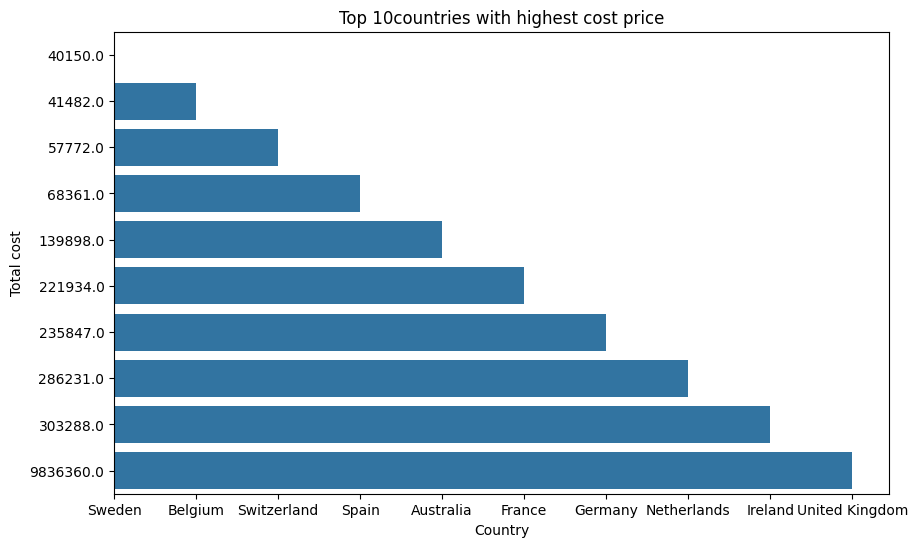

In [20]:
top10_df = top10_countries_with_highest_cost.reset_index()
# Rename the columns for better readability
top10_df.columns = ['Country', 'Total Cost']
x_data = top10_df["Country"]
y_data = top10_df["Total Cost"]
plt.figure(figsize=(10,6))
sns.barplot(x= x_data, y= y_data, data=top10_df, orient="h")
plt.title("Top 10countries with highest cost price")
plt.xlabel("Country")
plt.ylabel("Total cost")
plt.show()

# Year with most sales

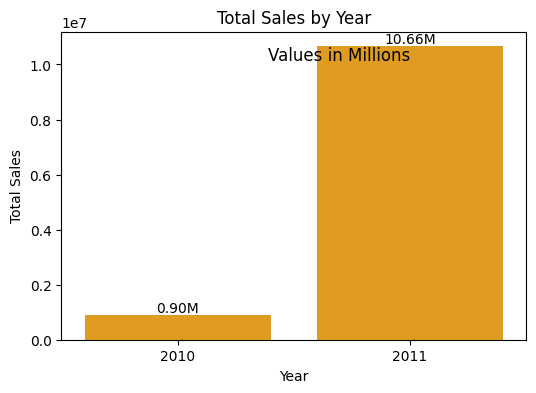

In [26]:
year_sales = df.groupby("Year")["Cost"].sum()

# Creating a dataframe
year_df = year_sales.reset_index()

# Assigning values to the column
year_df.columns = ['Year', 'Total Sales']
x_data = year_df["Year"]
y_data = year_df["Total Sales"]

plt.figure(figsize=(6,4))
bar_plot = sns.barplot(x=x_data, y=y_data, data=df, color="Orange")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Total Sales by Year")

#Adding labels on top of each bar
for index, value in enumerate(y_data):
    bar_plot.text(index, value, f'{value / 1e6:,.2f}M', ha='center', va='bottom')

#Add annotation text to indicate the values are in millions
plt.text(x=len(x_data) - 1, y=max(y_data), s='Values in Millions', ha='right', va='top', fontsize=12, color='black')

plt.show()

# Sales in every month

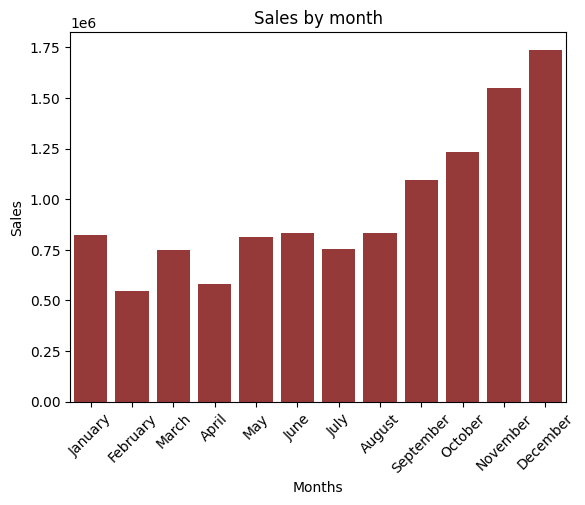

In [27]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales_by_month = df.groupby("Month_name_year_wise")["Cost"].sum()
sorted_sales_by_month = sales_by_month.reindex(month_order)

sns.barplot(x=sorted_sales_by_month.index,y=sorted_sales_by_month.values, color="Brown")
plt.title("Sales by month")
plt.xticks(rotation =  45)
plt.xlabel("Months")
plt.ylabel("Sales")
plt.show()

# Sales in week

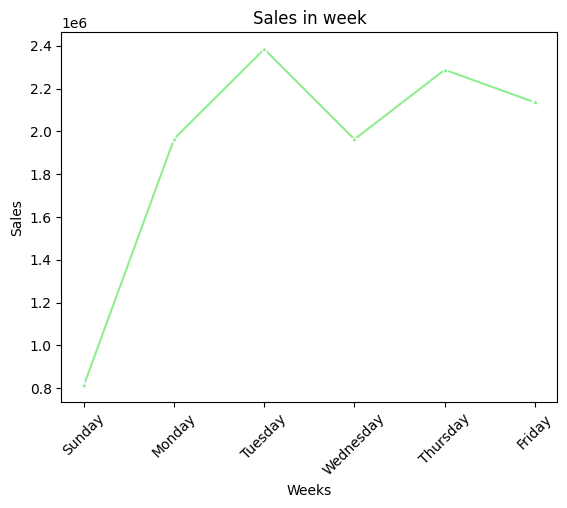

In [28]:
weeks = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
week_sales = df.groupby("Day_name")["Cost"].sum()
sorted_week_sales = week_sales.reindex(weeks)

sns.lineplot(x=sorted_week_sales.index, y=sorted_week_sales.values, color="LightGreen", marker="*")
plt.title("Sales in week")
plt.xticks(rotation = 45)
plt.xlabel("Weeks")
plt.ylabel("Sales")
plt.show()

# Countries which used retail shopping more

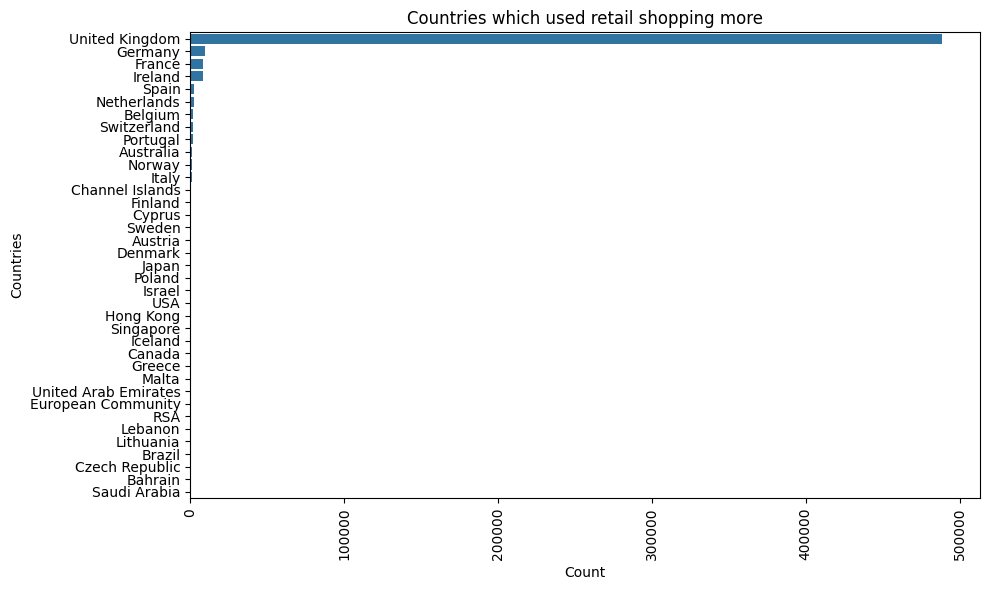

In [30]:
country_counts = df["Country"].value_counts()
df= pd.DataFrame(country_counts)
plt.figure(figsize=(10,6))
sns.barplot(data=country_counts, orient="h")
plt.xlabel('Count')
plt.ylabel('Countries')
plt.xticks(rotation = 90)
plt.title('Countries which used retail shopping more')
plt.tight_layout()
plt.show()

# Highest number stock codes present in description

In [47]:
stock_code = df.groupby('Description')["StockCode"].value_counts()
sorting = stock_code.sort_values(ascending=False)
top_10_stock_codes = sorting.head(10)
top_10_stock_codes

Description                         StockCode
WHITE HANGING HEART T-LIGHT HOLDER  85123A       2290
REGENCY CAKESTAND 3 TIER            22423        2187
JUMBO BAG RED RETROSPOT             85099B       2156
PARTY BUNTING                       47566        1720
LUNCH BAG RED RETROSPOT             20725        1623
ASSORTED COLOUR BIRD ORNAMENT       84879        1485
SET OF 3 CAKE TINS PANTRY DESIGN    22720        1465
PACK OF 72 RETROSPOT CAKE CASES     21212        1365
LUNCH BAG  BLACK SKULL.             20727        1322
NATURAL SLATE HEART CHALKBOARD      22457        1272
Name: count, dtype: int64

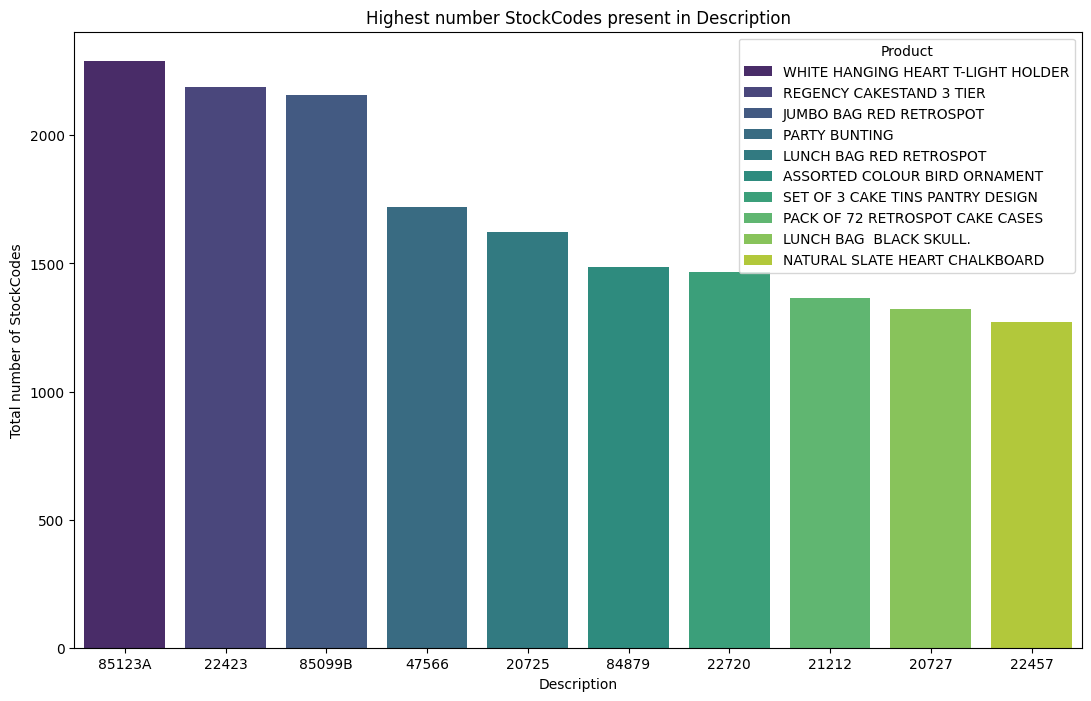

In [48]:
top_df = top_10_stock_codes.reset_index()
top_df.columns = ["Product", "Codes", "Total"]
x_data = top_df["Codes"]
y_data = top_df["Total"]
z_data = top_df["Product"]
plt.figure(figsize=(13,8))
sns.barplot(x=x_data, y=y_data, hue=z_data, palette = "viridis")
plt.title("Highest number StockCodes present in Description")
plt.xlabel("Description")
plt.ylabel("Total number of StockCodes")
plt.show()

# Top 10 Description by maxmimum quantity

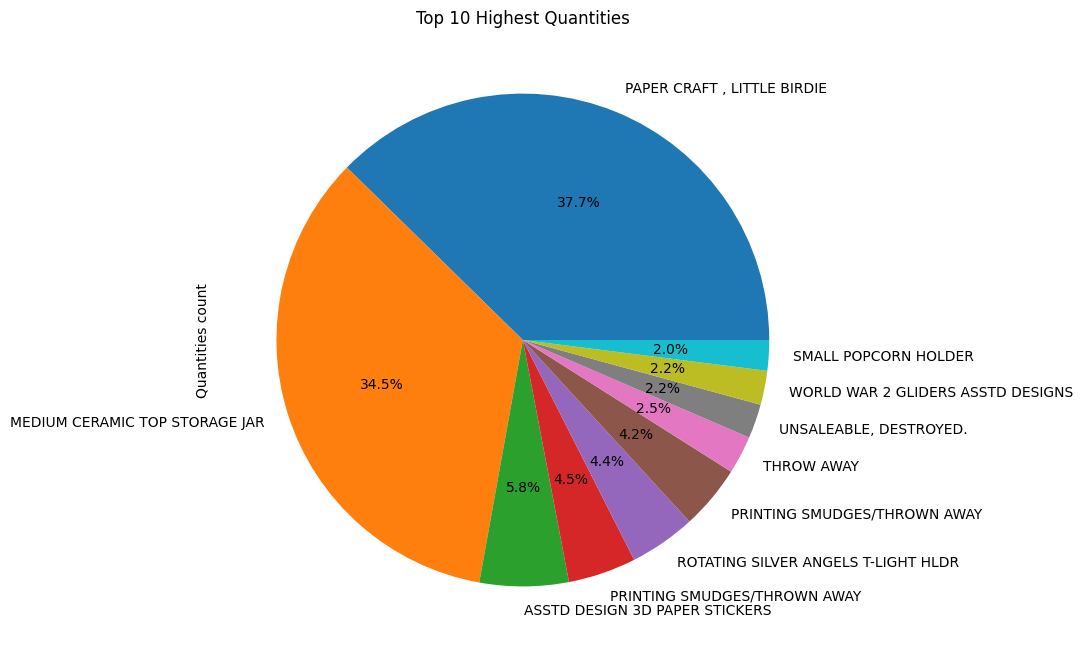

In [49]:
Description = df.groupby("Description")["Quantity"].max()
sorted = Description.sort_values(ascending=False).head(10)  #used to find the top 10 highest quantities for each unique description in your DataFrame.
top_10_df = sorted.reset_index()
top_10_df.columns = ["Product", "Quantities count"]
top_10_df["Product"] = top_10_df["Product"].str.upper()
x_data = top_10_df["Product"]
y_data = top_10_df["Quantities count"]
top_10_df.set_index('Product')['Quantities count'].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Top 10 Highest Quantities')
plt.show()



# Finding how many quantities count in Description

In [50]:
quantity = df.groupby("Description")["Quantity"].value_counts().head(30)
quantity

Description                    Quantity
4 PURPLE FLOCK DINNER CANDLES  1           17
                               2            7
                               12           6
                               3            3
                               4            3
                               6            3
50'S CHRISTMAS GIFT BAG LARGE  12          72
                               1           12
                               2           11
                               20          11
                               3            5
                               24           5
                               40           3
                               4            2
                               6            2
                               7            1
                               8            1
                               10           1
                               15           1
                               36           1
                               48       

In [51]:
top_10_df = quantity.reset_index()
top_10_df.columns = ["Products", "Quantities", "Q_Count"]
x_data = top_10_df["Products"]
y_data = top_10_df["Quantities"]
z_data = top_10_df["Q_Count"]
top_10_df

,Products,Quantities,Q_Count
0,4 PURPLE FLOCK DINNER CANDLES,1,17
1,4 PURPLE FLOCK DINNER CANDLES,2,7
2,4 PURPLE FLOCK DINNER CANDLES,12,6
3,4 PURPLE FLOCK DINNER CANDLES,3,3
4,4 PURPLE FLOCK DINNER CANDLES,4,3
5,4 PURPLE FLOCK DINNER CANDLES,6,3
6,50'S CHRISTMAS GIFT BAG LARGE,12,72
7,50'S CHRISTMAS GIFT BAG LARGE,1,12
8,50'S CHRISTMAS GIFT BAG LARGE,2,11
9,50'S CHRISTMAS GIFT BAG LARGE,20,11


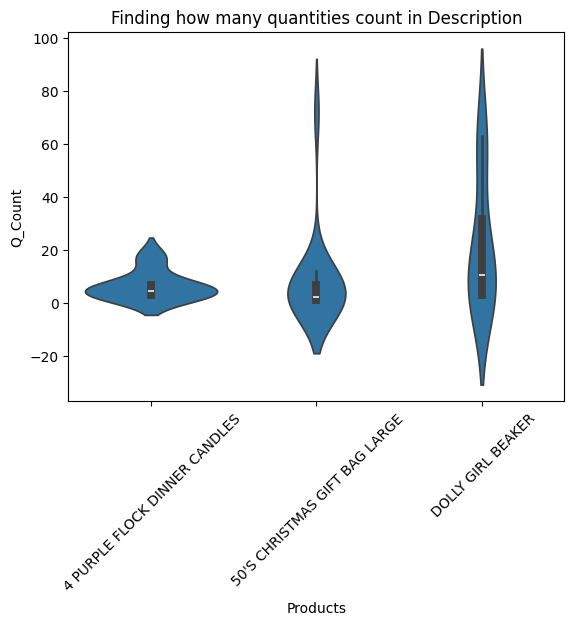

In [52]:
sns.violinplot(x=x_data,y=z_data)
plt.xticks(rotation=45)
plt.title("Finding how many quantities count in Description")
plt.show()

# First 10 Unit price with most counts

In [54]:
unit_price = df["UnitPrice"].value_counts().head(10)
unit_price

UnitPrice
1.25    49691
1.65    37596
0.85    28151
2.95    27333
0.42    24232
4.95    18811
3.75    18337
2.10    17374
2.46    17091
0.83    16891
Name: count, dtype: int64

In [55]:
colors = ['red', 'green', 'blue', 'pink', 'black', 'grey', 'yellow', 'cyan', 'brown', 'purple']
df_1 = unit_price.reset_index()
df_1.columns = ['Price', 'Total']
x_data = df_1['Price']
y_data = df_1['Total']
df_1

,Price,Total
0,1.25,49691
1,1.65,37596
2,0.85,28151
3,2.95,27333
4,0.42,24232
5,4.95,18811
6,3.75,18337
7,2.10,17374
8,2.46,17091
9,0.83,16891


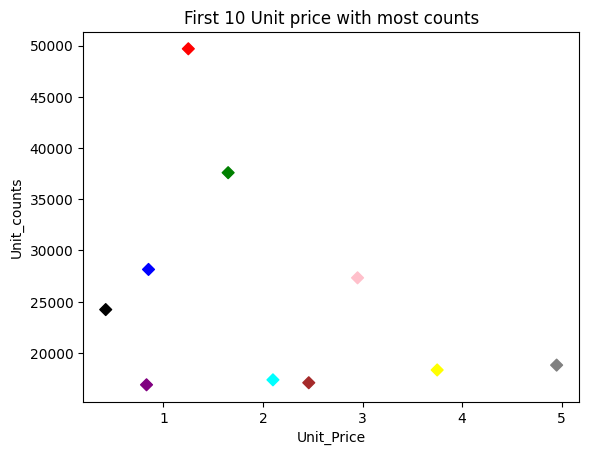

In [56]:
plt.scatter(x=x_data, y=y_data, c=colors, marker='D')
plt.title("First 10 Unit price with most counts")
plt.xlabel("Unit_Price")
plt.ylabel("Unit_counts")
plt.show()